In [3]:
# import the appropriate libraries
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
# load the CSV file taken from  https://www.kaggle.com/arjunbhasin2013/ccdata
df = pd.read_csv("~/Desktop/CC GENERAL.csv")

# Data dictionary
https://www.kaggle.com/arjunbhasin2013/ccdata

<ul>
<li>CUST_ID : Identification of Credit Card holder (Categorical)</li>
<li>BALANCE : Balance amount left in their account to make purchases</li>
<li>BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)</li>
<li>PURCHASES : Amount of purchases made from account</li>
<li>ONEOFF_PURCHASES : Maximum purchase amount done in one-go</li>
<li>INSTALLMENTS_PURCHASES : Amount of purchase done in installment</li>
<li>CASH_ADVANCE : Cash in advance given by the user</li>
<li>PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)</li>
<li>ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)</li>
<li>PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)</li>
<li>CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
<li>CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"</li>
<li>PURCHASES_TRX : Numbe of purchase transactions made</li>
<li>CREDIT_LIMIT : Limit of Credit Card for user</li>
<li>PAYMENTS : Amount of Payment done by user</li>
<li>MINIMUM_PAYMENTS : Minimum amount of payments made by user</li>
<li>PRCFULLPAYMENT : Percent of full payment paid by user</li>
<li>TENURE : Tenure of credit card service for user</li>
</ul>

In [5]:
df = df.dropna()
df.columns
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


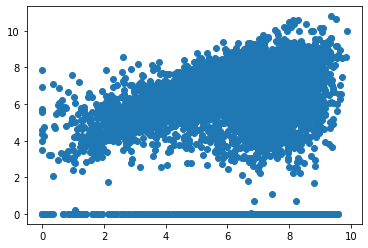

In [6]:
# let's explore the variables to see what might be interesting
# are there any variables that need to be transformed because
# they are not normally distributed?  (e.g. balance, purchases)
df['ln_balance'] = np.log(df['BALANCE'] + 1)
df['ln_purchases'] = np.log(df['PURCHASES'] + 1)
plt.scatter(df['ln_balance'], df['ln_purchases'])
plt.show()

In [7]:
# we now move to looking at how a clustering approach might work
# let's use the same two dependent variables and try to create 4 clusters
dfc = df[['ln_balance','ln_purchases']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(dfc)
clusters = kmeans.cluster_centers_
clusters # shows the centroid of the clusters

array([[7.2533259 , 5.42512021],
       [7.12669916, 0.0218491 ],
       [3.65046366, 5.79529022],
       [7.08971211, 7.63189968]])

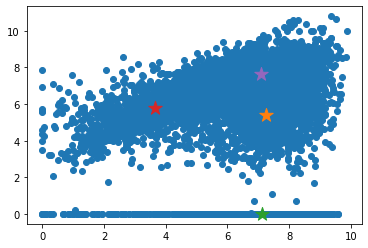

In [8]:
# now we can plot the data along with the centroids
# can you do better?
plt.scatter(dfc['ln_balance'],dfc['ln_purchases'])
plt.scatter(clusters[0][0],clusters[0][1], marker="*", s=200)
plt.scatter(clusters[1][0],clusters[1][1], marker="*", s=200)
plt.scatter(clusters[2][0],clusters[2][1], marker="*", s=200)
plt.scatter(clusters[3][0],clusters[3][1], marker="*", s=200)
plt.show()